## **Local Binary Pattern - Maria Jimena Vargas López**

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from skimage.feature import local_binary_pattern
from google.colab import drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


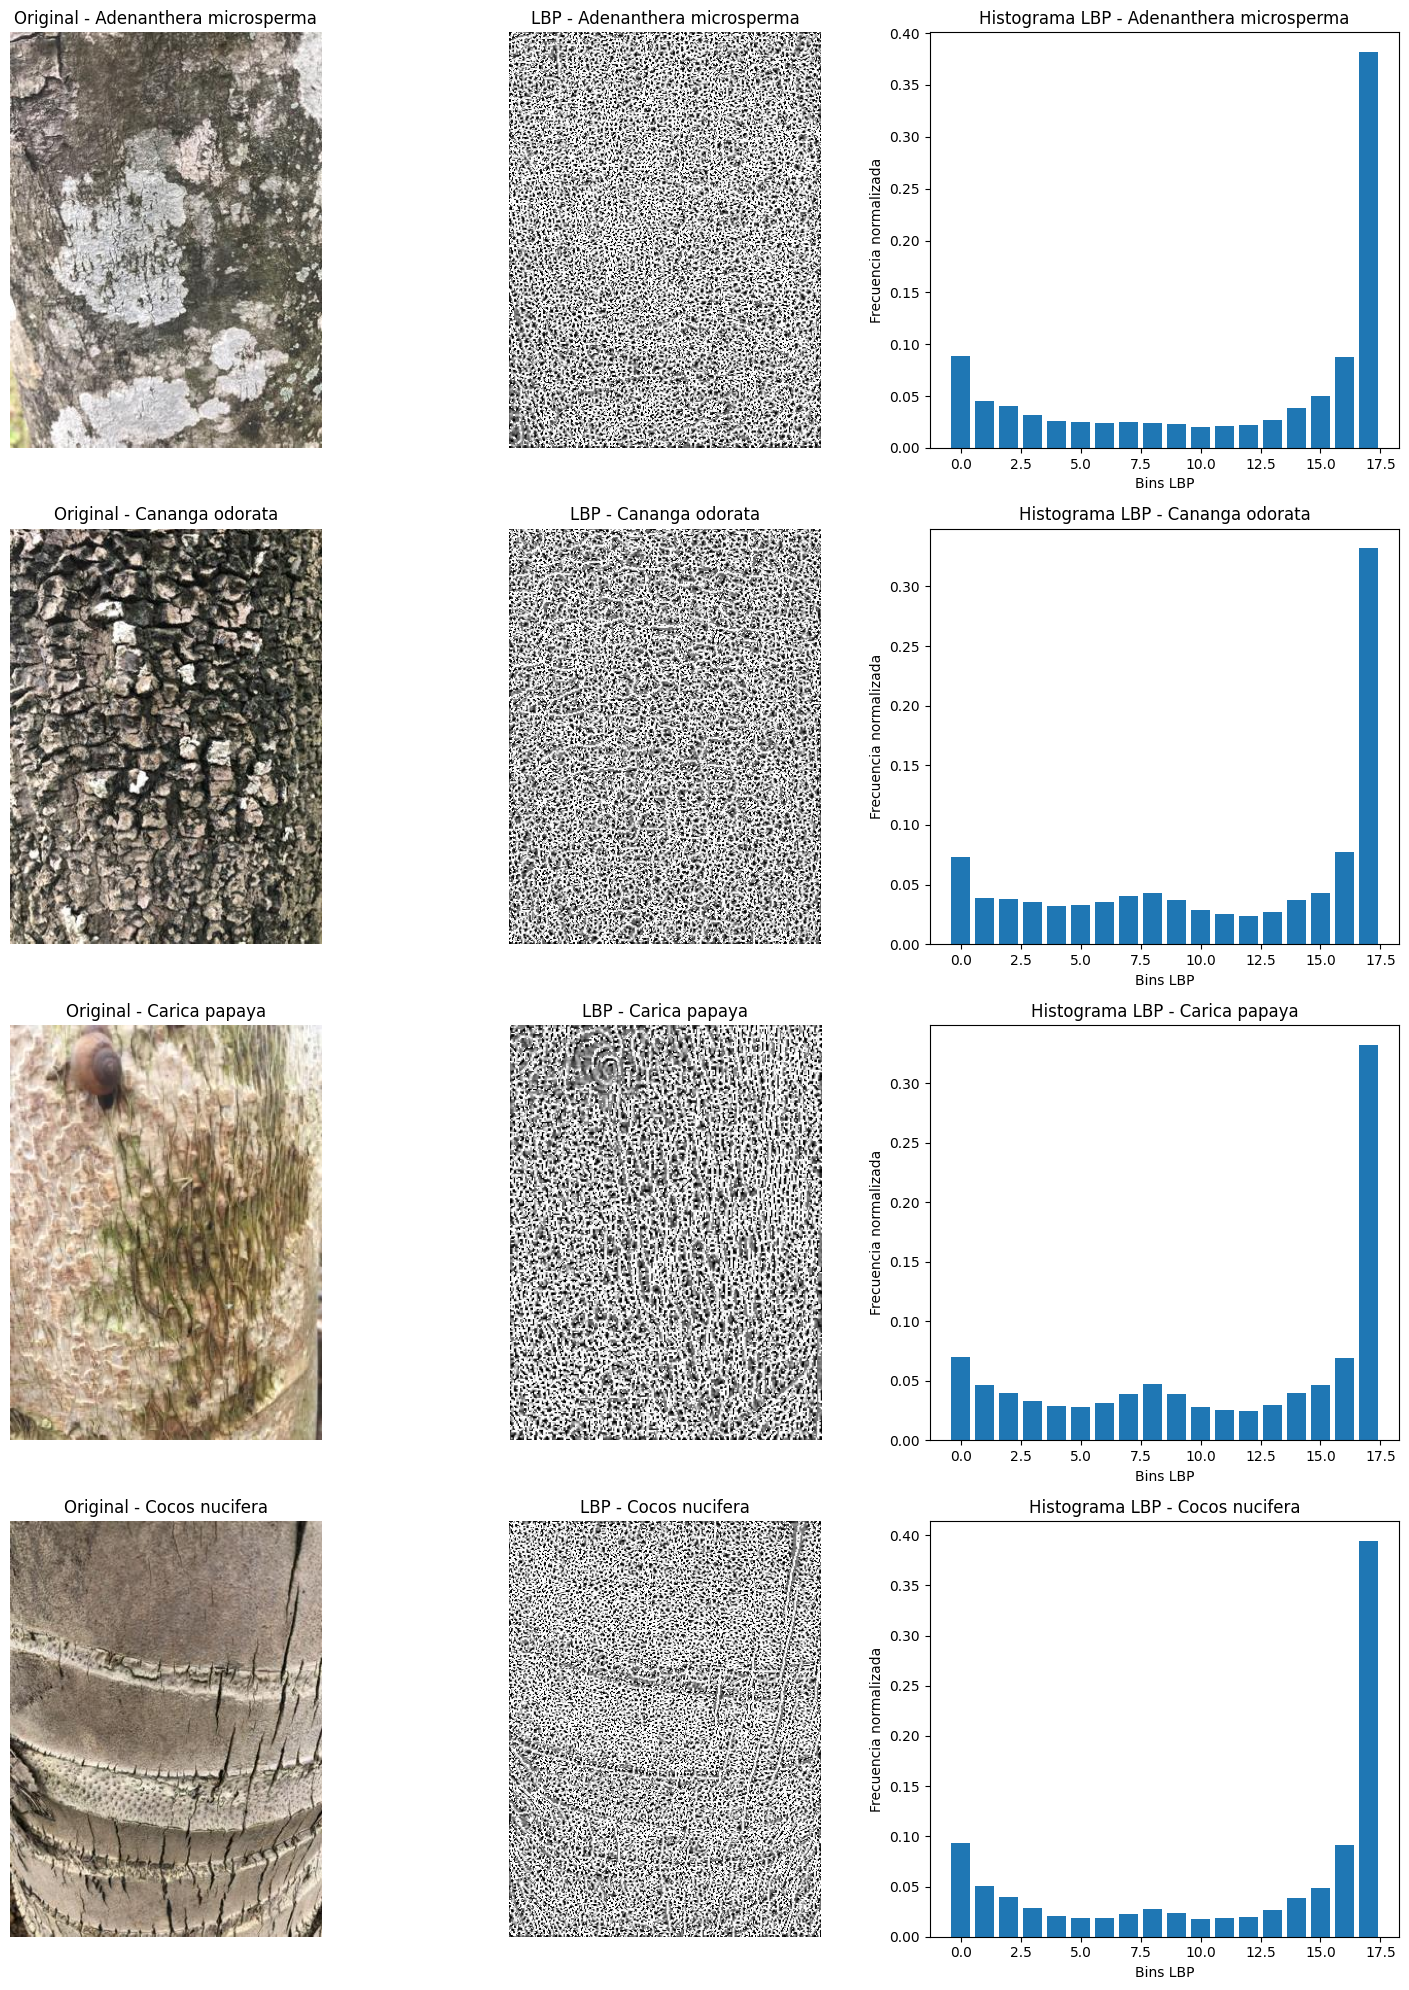

In [2]:
# Montar Google Drive (si estás en Colab)
drive.mount('/content/drive')

# Configuración de parámetros LBP
radius = 2
n_points = 8 * radius
method = 'uniform'
bins = n_points + 2

# Ruta base
base_path = '/content/drive/MyDrive/VISIÓN POR COMPUTADORA/TALLER 3/DATOS'

# Listar clases
classes = [d for d in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, d))]

# Preparar figura
fig, axes = plt.subplots(len(classes), 3, figsize=(15, 5*len(classes)))
if len(classes) == 1:
    axes = axes.reshape(1, -1)

# Función auxiliar para LBP
def extract_lbp_and_histogram(gray_img):
    lbp = local_binary_pattern(gray_img, n_points, radius, method)
    hist, _ = np.histogram(lbp.ravel(), bins=bins, range=(0, bins))
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-7)
    return lbp, hist

# Visualizar una imagen por clase
for i, class_name in enumerate(classes):
    class_path = os.path.join(base_path, class_name)
    images = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    if not images:
        print(f"No se encontraron imágenes en {class_path}")
        continue

    img_path = os.path.join(class_path, images[0])
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    lbp, hist = extract_lbp_and_histogram(gray)

    # Mostrar resultados
    axes[i, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[i, 0].set_title(f'Original - {class_name}')
    axes[i, 0].axis('off')

    axes[i, 1].imshow(lbp, cmap='gray')
    axes[i, 1].set_title(f'LBP - {class_name}')
    axes[i, 1].axis('off')

    axes[i, 2].bar(np.arange(len(hist)), hist)
    axes[i, 2].set_title(f'Histograma LBP - {class_name}')
    axes[i, 2].set_xlabel('Bins LBP')
    axes[i, 2].set_ylabel('Frecuencia normalizada')

plt.tight_layout()
plt.show()

In [3]:
# Crear lista para almacenar los datos
data = []

# Procesar todas las imágenes de todas las clases
for class_name in classes:
    class_path = os.path.join(base_path, class_name)
    images = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    for img_name in images:
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        lbp, hist = extract_lbp_and_histogram(gray)

        # Crear diccionario con características
        features = {
            'class': class_name,
            'image_name': img_name,
            **{f'lbp_bin_{i}': hist[i] for i in range(len(hist))},
            'lbp_mean': np.mean(lbp),
            'lbp_std': np.std(lbp),
            'lbp_energy': np.sum(hist**2)
        }

        data.append(features)

# Crear DataFrame
df_lbp = pd.DataFrame(data)

# Mostrar las primeras filas del DataFrame
print(f"DataFrame shape: {df_lbp.shape}")
display(df_lbp.head())

# Guardar como CSV
output_path = '/content/drive/MyDrive/VISIÓN POR COMPUTADORA/TALLER 3/lbp_features.csv'
df_lbp.to_csv(output_path, index=False)
print(f"\nDataFrame guardado en: {output_path}")

DataFrame shape: (498, 23)


,class,image_name,lbp_bin_0,lbp_bin_1,lbp_bin_2,lbp_bin_3,lbp_bin_4,lbp_bin_5,lbp_bin_6,lbp_bin_7,...,lbp_bin_11,lbp_bin_12,lbp_bin_13,lbp_bin_14,lbp_bin_15,lbp_bin_16,lbp_bin_17,lbp_mean,lbp_std,lbp_energy
0,Adenanthera microsperma,IMG_5786.JPG,0.088954,0.045290,0.039988,0.031312,0.025741,0.024573,0.024491,0.024573,...,0.020880,0.021885,0.026574,0.038746,0.049701,0.087924,0.381613,11.389194,6.409130,0.175507
1,Adenanthera microsperma,IMG_5783.JPG,0.096665,0.047806,0.040829,0.027702,0.022473,0.021174,0.020145,0.021174,...,0.018323,0.017972,0.024981,0.038174,0.050575,0.092997,0.399079,11.520227,6.499898,0.190289
2,Adenanthera microsperma,IMG_5785.JPG,0.092115,0.046213,0.039490,0.030406,0.024123,0.023184,0.023298,0.022343,...,0.019826,0.020603,0.025700,0.038575,0.049987,0.090530,0.390771,11.467830,6.446486,0.182953
3,Adenanthera microsperma,IMG_5781.JPG,0.098634,0.049325,0.040494,0.029066,0.022702,0.020406,0.018912,0.019271,...,0.017441,0.018193,0.024009,0.038134,0.053116,0.092483,0.402591,11.529531,6.537308,0.193448
4,Adenanthera microsperma,IMG_5778.JPG,0.095946,0.045077,0.038076,0.029164,0.024189,0.023437,0.023413,0.022539,...,0.018928,0.019606,0.026721,0.038861,0.049513,0.092638,0.389194,11.458730,6.459828,0.182517



DataFrame guardado en: /content/drive/MyDrive/VISIÓN POR COMPUTADORA/TALLER 3/lbp_features.csv


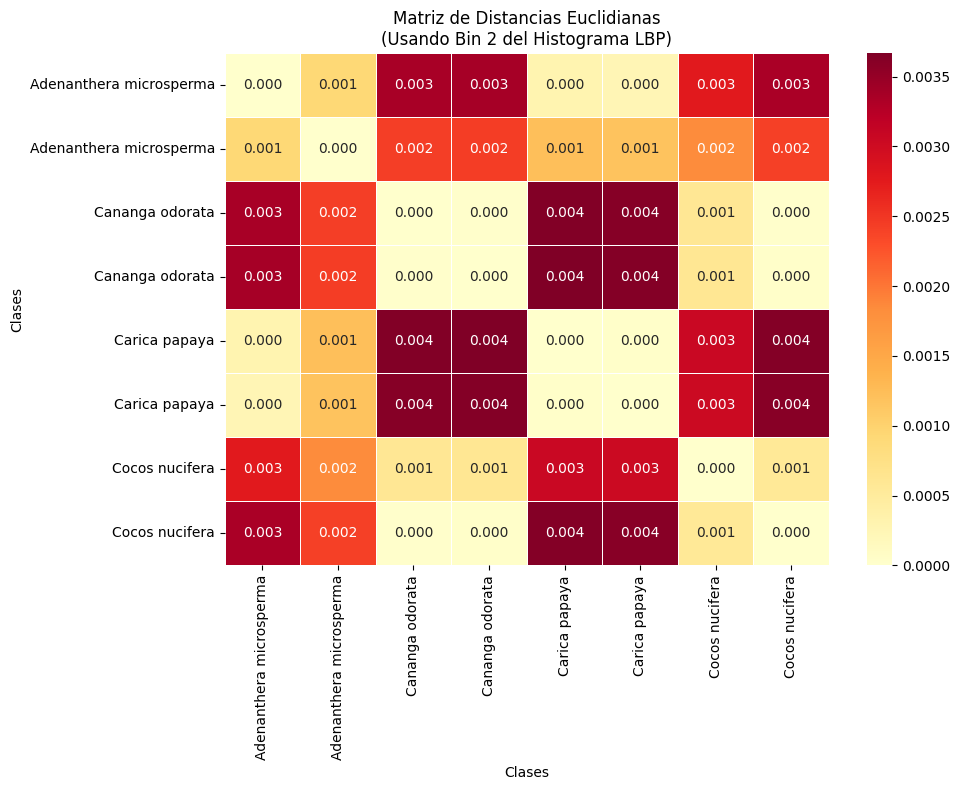

In [27]:
# Parámetros manuales
selected_bin = 2  # Cambia este número para usar otro bin
n_images_per_class = 2  # Número de imágenes por clase a comparar

# Verificación de existencia del bin
bin_column = f'lbp_bin_{selected_bin}'
if bin_column not in df_lbp.columns:
    raise ValueError(f"El bin {selected_bin} no está disponible en las columnas del DataFrame.")

# Seleccionar imágenes con el mayor valor en el bin seleccionado
selected_images = (
    df_lbp.groupby('class')[['class', 'image_name', bin_column]]
          .apply(lambda x: x.nlargest(n_images_per_class, bin_column))
          .reset_index(drop=True)
)


# Extraer values del bin seleccionado
feature_values = selected_images[bin_column].values

# Calcular matriz de distancias euclidianas (solo con el valor del bin)
from scipy.spatial.distance import pdist, squareform
distance_matrix = squareform(pdist(feature_values.reshape(-1, 1), metric='euclidean'))

# Etiquetas para el heatmap (solo clase)
labels = selected_images['class'].values

# Crear heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(distance_matrix,
            annot=True,
            fmt=".3f",
            cmap="YlOrRd",
            xticklabels=labels,
            yticklabels=labels,
            linewidths=.5)

plt.title(f'Matriz de Distancias Euclidianas\n(Usando Bin {selected_bin} del Histograma LBP)')
plt.xlabel('Clases')
plt.ylabel('Clases')
plt.tight_layout()
plt.show()

In [65]:
# Seleccionar características para el eje X e Y
x_feature = 'lbp_bin_13'  # Cambia por cualquier bin o característica como 'lbp_mean', 'lbp_std', etc.
y_feature = 'lbp_energy'  # Puedes usar 'lbp_bin_2', 'lbp_energy', etc.


# Verificar que existan en el DataFrame
if x_feature not in df_lbp.columns or y_feature not in df_lbp.columns:
    raise ValueError(f"Una o ambas características '{x_feature}', '{y_feature}' no existen en el DataFrame.")

# Crear scatter plot con Plotly (gráfico bonito y exportable)
fig = px.scatter(
    df_lbp,
    x=x_feature,
    y=y_feature,
    color='class',
    hover_name='image_name',
    title=f'Scatter Plot de Características LBP: {x_feature} vs {y_feature}',
    width=900,
    height=600
)

# Opcional: mejorar estilo
fig.update_traces(marker=dict(size=10, opacity=0.8, line=dict(width=1, color='DarkSlateGrey')))
fig.update_layout(
    plot_bgcolor='rgba(245,245,245,0.95)',
    paper_bgcolor='white',
    font=dict(size=13)
)

fig.show()
